# importing libraries

In [1]:
import numpy as np
import pandas as pd

# Loading dataset

In [2]:
df=pd.read_csv('D:/Research Work/road/attacks/fuzzing_attack_2.log')
df.head()

,(1010000000.000000) can0 00E#20529602080975B8
0,(1010000000.001070) can0 153#00000004000C0004
1,(1010000000.002090) can0 295#0000000000000040
2,(1010000000.002091) can0 662#4EE0000040000000
3,(1010000000.002092) can0 19C#08F62000020028C0
4,(1010000000.002093) can0 0D0#22770460F8000000


# Spliting the data in different columns

In [3]:
log_data  = open('D:/Research Work/road/attacks/fuzzing_attack_2.log', 'r')
split_list = []

for line in log_data:
    thing1 = line.split(' ')
    time = thing1[0][1:18]
    idd = thing1[1][:4]
    message = thing1[2]
    

    split_list.append([time, idd, message])

df1 = pd.DataFrame(split_list, columns=['Unix Timestamp', 'Channel', 'IDHexandDataFeild'])
#df1['Message'].map(str.strip)
df1

,Unix Timestamp,Channel,IDHexandDataFeild
0,1010000000.000000,can0,00E#20529602080975B8\n
1,1010000000.001070,can0,153#00000004000C0004\n
2,1010000000.002090,can0,295#0000000000000040\n
3,1010000000.002091,can0,662#4EE0000040000000\n
4,1010000000.002092,can0,19C#08F62000020028C0\n
...,...,...,...
32346,1010000013.362264,can0,0C0#2000000000000000\n
32347,1010000013.363290,can0,03C#0000040037000000\n
32348,1010000013.363291,can0,354#1FF3C00000052E00\n
32349,1010000013.363292,can0,522#DF7FD0007D28001C\n


# Seprating id and dataframe

In [4]:
out = pd.DataFrame(df1.IDHexandDataFeild.str.split('#',1).tolist(),columns=['IDhex','DataFrame'])
out.head()

,IDhex,DataFrame
0,00E,20529602080975B8\n
1,153,00000004000C0004\n
2,295,0000000000000040\n
3,662,4EE0000040000000\n
4,19C,08F62000020028C0\n


# choosing these two columns from the original dataset

In [5]:
df2=df1[['Unix Timestamp', 'Channel']] 
df2.head()

,Unix Timestamp,Channel
0,1010000000.000000,can0
1,1010000000.001070,can0
2,1010000000.002090,can0
3,1010000000.002091,can0
4,1010000000.002092,can0


# Converting the data of IDhex column which is in hexadecimal to decimal 

In [6]:
out['IDhex'] = out['IDhex'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,14,20529602080975B8\n
1,339,00000004000C0004\n
2,661,0000000000000040\n
3,1634,4EE0000040000000\n
4,412,08F62000020028C0\n
...,...,...
32346,192,2000000000000000\n
32347,60,0000040037000000\n
32348,852,1FF3C00000052E00\n
32349,1314,DF7FD0007D28001C\n


# here converting the DataFrame column's hex data in decimal

In [7]:
out['DataFrame'].str.strip('\n')
out['DataFrame'] = out['DataFrame'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,14,2329088892772906424
1,339,17180655620
2,661,64
3,1634,5683542730815307776
4,412,645738780979898560
...,...,...
32346,192,2305843009213693952
32347,60,4398969257984
32348,852,2302394940749327872
32349,1314,16104819493018533916


In [8]:
#checking the out data which i have converted in decimal which was in hexadecimal
out.head()

,IDhex,DataFrame
0,14,2329088892772906424
1,339,17180655620
2,661,64
3,1634,5683542730815307776
4,412,645738780979898560


In [9]:
#now here i'm collecting the two data which i have above splitted from the original data.
#df2 ==here i have collected the data which i don't need to convert in decimaml 
#in out data i have collected the data which i have to convert into decimal.
frames=[df2,out]

In [10]:
# here i concate the two datas, because it need to be togather
result=pd.concat(frames ,axis=1)
result.head()

,Unix Timestamp,Channel,IDhex,DataFrame
0,1010000000.000000,can0,14,2329088892772906424
1,1010000000.001070,can0,339,17180655620
2,1010000000.002090,can0,661,64
3,1010000000.002091,can0,1634,5683542730815307776
4,1010000000.002092,can0,412,645738780979898560


In [11]:
#here i have save my data which i have splitted and  converted in decimal 
save=result.to_csv("D:/Research Work/road/extractedfrompython/fuzzing_attack2.csv")

In [12]:
result

,Unix Timestamp,Channel,IDhex,DataFrame
0,1010000000.000000,can0,14,2329088892772906424
1,1010000000.001070,can0,339,17180655620
2,1010000000.002090,can0,661,64
3,1010000000.002091,can0,1634,5683542730815307776
4,1010000000.002092,can0,412,645738780979898560
...,...,...,...,...
32346,1010000013.362264,can0,192,2305843009213693952
32347,1010000013.363290,can0,60,4398969257984
32348,1010000013.363291,can0,852,2302394940749327872
32349,1010000013.363292,can0,1314,16104819493018533916


In [13]:
#checking is there any null values in dataframe column
result['DataFrame'].isnull().sum()
#Unix Timestamp	Channel	IDhex	DataFrame

0

In [14]:
#checking the shape of data ,we have 32 tgousand 3 hundred and 51 rows and 4 columns
result.shape

(32351, 4)

In [15]:
#here we have acknowledge that 
result.size

129404

In [16]:
print(result['Unix Timestamp'].unique())
print(result['Unix Timestamp'].nunique())

['1010000000.000000' '1010000000.001070' '1010000000.002090' ...
 '1010000013.363291' '1010000013.363292' '1010000013.365329']
31985


In [17]:
result['Channel'].unique()

array(['can0'], dtype=object)

In [18]:
result = result.loc[:, ~result.columns.str.contains('^Channel')]

result

,Unix Timestamp,IDhex,DataFrame
0,1010000000.000000,14,2329088892772906424
1,1010000000.001070,339,17180655620
2,1010000000.002090,661,64
3,1010000000.002091,1634,5683542730815307776
4,1010000000.002092,412,645738780979898560
...,...,...,...
32346,1010000013.362264,192,2305843009213693952
32347,1010000013.363290,60,4398969257984
32348,1010000013.363291,852,2302394940749327872
32349,1010000013.363292,1314,16104819493018533916


In [19]:
import matplotlib.pyplot as plt


In [20]:
n =16500  #chunk row size
list_df = [result[i:i+n]
for i in range(0,result.shape[0],n)]

In [21]:
list_df[0]
list_df[1]


,Unix Timestamp,IDhex,DataFrame
16500,1010000006.891179,1049,764281858369241711
16501,1010000006.891180,263,0
16502,1010000006.891181,4095,0
16503,1010000006.892178,1760,73466081334919425
16504,1010000006.893191,961,8887044329934170414
...,...,...,...
32346,1010000013.362264,192,2305843009213693952
32347,1010000013.363290,60,4398969257984
32348,1010000013.363291,852,2302394940749327872
32349,1010000013.363292,1314,16104819493018533916


In [22]:
res=list_df[0]
res.shape

(16500, 3)

In [23]:
X = res.iloc[:, :3].values
X

array([['1010000000.000000', 14, 2329088892772906424],
       ['1010000000.001070', 339, 17180655620],
       ['1010000000.002090', 661, 64],
       ...,
       ['1010000006.889139', 14, 2329018524028728894],
       ['1010000006.890159', 208, 3059928081801225216],
       ['1010000006.891178', 51, 2172635198785488]], dtype=object)

In [24]:
y = res.iloc[:, 2].values
y

array([2329088892772906424,         17180655620,                  64, ...,
       2329018524028728894, 3059928081801225216,    2172635198785488],
      dtype=uint64)

In [25]:
print(X)
print(y)

[['1010000000.000000' 14 2329088892772906424]
 ['1010000000.001070' 339 17180655620]
 ['1010000000.002090' 661 64]
 ...
 ['1010000006.889139' 14 2329018524028728894]
 ['1010000006.890159' 208 3059928081801225216]
 ['1010000006.891178' 51 2172635198785488]]
[2329088892772906424         17180655620                  64 ...
 2329018524028728894 3059928081801225216    2172635198785488]


In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# RANDOM FOREST

In [27]:
from sklearn import metrics
model= RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction), '\n')


Accuracy From Random Forest:  0.6032323232323232 



# KNN

In [28]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

prediction=knn1.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.794949494949495


# DECISION TREE

In [29]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))  




Accuracy DEcision Tree:  0.6034343434343434


In [30]:
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





# SVM

In [33]:
svm_m=SVC()
svm_m.fit(X_train,y_train)
prediction=svm_m.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')



Accuracy:  0.21474747474747474 



# SECOND CHUNK

In [31]:

res2=list_df[1]
res2

,Unix Timestamp,IDhex,DataFrame
16500,1010000006.891179,1049,764281858369241711
16501,1010000006.891180,263,0
16502,1010000006.891181,4095,0
16503,1010000006.892178,1760,73466081334919425
16504,1010000006.893191,961,8887044329934170414
...,...,...,...
32346,1010000013.362264,192,2305843009213693952
32347,1010000013.363290,60,4398969257984
32348,1010000013.363291,852,2302394940749327872
32349,1010000013.363292,1314,16104819493018533916


In [32]:
X = res2.iloc[:, :3].values
X

array([['1010000006.891179', 1049, 764281858369241711],
       ['1010000006.891180', 263, 0],
       ['1010000006.891181', 4095, 0],
       ...,
       ['1010000013.363291', 852, 2302394940749327872],
       ['1010000013.363292', 1314, 16104819493018533916],
       ['1010000013.365329', 870, 9231754722116357688]], dtype=object)

In [33]:
y = res2.iloc[:,2].values
y

array([  764281858369241711,                    0,                    0,
       ...,  2302394940749327872, 16104819493018533916,
        9231754722116357688], dtype=uint64)

In [34]:
res2.shape

(15851, 3)

# RANDOM FOREST

In [35]:
from sklearn import metrics
model2= RandomForestClassifier()
model2.fit(X_train,y_train)
prediction=model2.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction), '\n')



Accuracy From Random Forest:  0.6026262626262626 



# KNN

In [36]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

prediction=knn2.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.794949494949495


# DECISION TREE

In [37]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))




Accuracy DEcision Tree:  0.6034343434343434


# SVM

In [63]:
svm_m2=SVC()
svm_m2.fit(X_train,y_train)
prediction=svm_m2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')


Accuracy:  0.20895238095238095 



In [38]:
res=list_df[0]
res.shape

(16500, 3)

# Hyper parameter Tunning:

# KNN:

In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

All Accuracies:  [0.74022699 0.74905422 0.77175284 0.7667087  0.76166456 0.76040353
 0.77427491 0.77553594 0.78814628 0.77553594 0.76796974 0.7739899
 0.78030303 0.76010101 0.76388889 0.76262626 0.74242424 0.75378788
 0.76767677 0.73863636] 

Mean of all Accuracies:  0.7637353993911372 

Standard Deviation:  0.01313928753729028


Text(0, 0.5, 'Cross-Validated Accuracy')

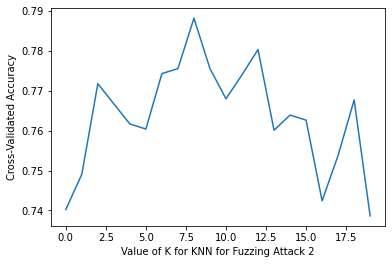

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN for Fuzzing Attack 2')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.62110727 0.64013841 0.64013841 0.65916955 0.66608997 0.65397924
 0.63321799 0.64532872 0.66262976 0.64532872 0.65337955 0.64298094
 0.67244367 0.66377816 0.70017331 0.64124783 0.65857886 0.64644714
 0.64644714 0.65337955] 

Mean of all Accuracies:  0.6522992090097329 

Standard Deviation:  0.016164196781748696


Text(0, 0.5, 'Cross-Validated Accuracy')

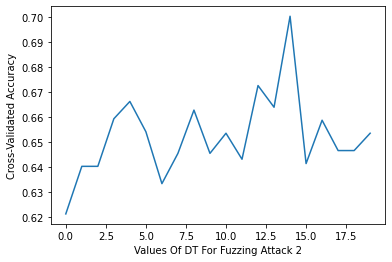

In [45]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =5,  min_samples_split =5,
                              min_samples_leaf =2, max_features =2)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of DT For Fuzzing Attack 2')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.52941176 0.55536332 0.56401384 0.57093426 0.57266436 0.56920415
 0.56055363 0.56401384 0.58477509 0.54152249 0.57365685 0.56152513
 0.59098787 0.57019064 0.60831889 0.57712305 0.55285962 0.55112652
 0.55285962 0.58232236] 

Mean of all Accuracies:  0.5666713642333271
Standard Deviation:  0.017290534934446097


Text(0, 0.5, 'Cross- Validated Accuracy')

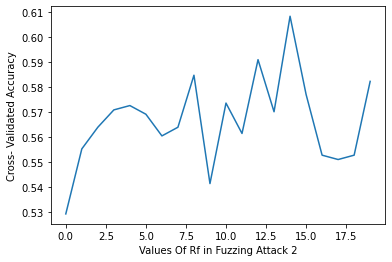

In [46]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=25, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean())
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf in Fuzzing Attack 2')
plt.ylabel('Cross- Validated Accuracy')
